#Loan Repayment Assessment in Banking

Building and training a model that identifies a customer will repay or default from the loan dataset.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from xgboost import XGBClassifier
from sklearn.metrics import classification_report


In [4]:
# Lets load the datasets
# Loading Traning data
df = pd.read_csv("/content/drive/MyDrive/train_loan_data (1).csv")

# Loading Testing data
test_data = pd.read_csv("/content/drive/MyDrive/test_loan_data (1).csv")


# Managing missing data, outliers, and data inconsistencies

In [5]:
# Lets check the summary of  datasets
print('Summary of train dataset:')
df.info()
print('\nSummary of test dataset:')
test_data.info()

Summary of train dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   addr_state            80000 non-null  object 
 1   annual_inc            80000 non-null  float64
 2   earliest_cr_line      80000 non-null  object 
 3   emp_length            75412 non-null  object 
 4   emp_title             74982 non-null  object 
 5   fico_range_high       80000 non-null  int64  
 6   fico_range_low        80000 non-null  int64  
 7   grade                 80000 non-null  object 
 8   home_ownership        80000 non-null  object 
 9   application_type      80000 non-null  object 
 10  initial_list_status   80000 non-null  object 
 11  int_rate              80000 non-null  float64
 12  loan_amnt             80000 non-null  int64  
 13  num_actv_bc_tl        76052 non-null  float64
 14  mort_acc              77229 non-null  float6

In [6]:
# Display the first few rows of the dataset
df.head()

,addr_state,annual_inc,earliest_cr_line,emp_length,emp_title,fico_range_high,fico_range_low,grade,home_ownership,application_type,...,pub_rec_bankruptcies,purpose,revol_bal,revol_util,sub_grade,term,title,total_acc,verification_status,loan_status
0,CO,85000.0,Jul-97,10+ years,Deputy,744,740,E,MORTGAGE,Individual,...,0.0,debt_consolidation,5338,93.6,E1,60 months,Debt consolidation,8,Source Verified,Defaulted
1,CA,40000.0,Apr-87,10+ years,Department of Veterans Affairs,724,720,B,RENT,Individual,...,0.0,debt_consolidation,19944,60.3,B1,36 months,Credit Loan,12,Verified,Paid
2,FL,60000.0,Aug-07,10+ years,Marble polishing,679,675,B,MORTGAGE,Individual,...,0.0,debt_consolidation,23199,88.5,B5,36 months,Debt consolidation,16,Source Verified,Paid
3,IL,100742.0,Sep-80,10+ years,printer,664,660,B,MORTGAGE,Individual,...,0.0,debt_consolidation,18425,69.0,B2,36 months,Debt consolidation,19,Source Verified,Paid
4,MD,80000.0,Jul-99,10+ years,Southern Mgmt,669,665,F,RENT,Individual,...,0.0,debt_consolidation,34370,90.0,F5,60 months,Debt Connsolidation,59,Verified,Paid


In [7]:
# checking the dimensions of the dataset
df.shape

(80000, 28)

In [8]:
# Summary statistics
print("\nSummary statistics of numerical features:")
df.describe()


Summary statistics of numerical features:


,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,80000.000000,80000.000000,80000.000000,80000.000000,76052.000000,77229.000000,7.605200e+04,80000.000000,80000.000000,79969.000000,8.000000e+04,79947.000000,80000.000000
mean,7.604614e+04,699.987975,695.987813,13.232898,14403.867813,3.633790,1.674759,1.415864e+05,11.605675,0.216675,0.137103,1.628934e+04,51.899142,25.036875
std,6.902006e+04,31.734840,31.734075,4.771705,8703.826298,2.262505,2.005104,1.593714e+05,5.483362,0.579854,0.383202,2.264915e+04,24.504836,12.009194
min,0.000000e+00,664.000000,660.000000,5.310000,750.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000
25%,4.600000e+04,674.000000,670.000000,9.750000,7925.000000,2.000000,0.000000,2.964200e+04,8.000000,0.000000,0.000000,5.965750e+03,33.500000,16.000000
50%,6.500000e+04,694.000000,690.000000,12.740000,12000.000000,3.000000,1.000000,8.100050e+04,11.000000,0.000000,0.000000,1.111100e+04,52.200000,23.000000
75%,9.000000e+04,714.000000,710.000000,15.990000,20000.000000,5.000000,3.000000,2.110272e+05,14.000000,0.000000,0.000000,1.963500e+04,70.800000,32.000000
max,7.141778e+06,850.000000,845.000000,30.990000,40000.000000,32.000000,32.000000,5.172185e+06,80.000000,24.000000,7.000000,1.023940e+06,152.600000,162.000000


In [9]:
df.columns

Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_length',
       'emp_title', 'fico_range_high', 'fico_range_low', 'grade',
       'home_ownership', 'application_type', 'initial_list_status', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'pub_rec', 'pub_rec_bankruptcies', 'purpose', 'revol_bal', 'revol_util',
       'sub_grade', 'term', 'title', 'total_acc', 'verification_status',
       'loan_status'],
      dtype='object')

In [10]:
# checking for missing values if any
df.isnull().sum()

addr_state                 0
annual_inc                 0
earliest_cr_line           0
emp_length              4588
emp_title               5018
fico_range_high            0
fico_range_low             0
grade                      0
home_ownership             0
application_type           0
initial_list_status        0
int_rate                   0
loan_amnt                  0
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
open_acc                   0
pub_rec                    0
pub_rec_bankruptcies      31
purpose                    0
revol_bal                  0
revol_util                53
sub_grade                  0
term                       0
title                    970
total_acc                  0
verification_status        0
loan_status                0
dtype: int64

In [11]:
# Checking for missing values in train_data
train_missing_values = df.isnull().sum()
print("Columns with missing values in train data:")
print(train_missing_values[train_missing_values > 0])

# Checking for missing values in test_data
test_missing_values = test_data.isnull().sum()
print("\nColumns with missing values in test data:")
print(test_missing_values[test_missing_values > 0])

Columns with missing values in train data:
emp_length              4588
emp_title               5018
num_actv_bc_tl          3948
mort_acc                2771
tot_cur_bal             3948
pub_rec_bankruptcies      31
revol_util                53
title                    970
dtype: int64

Columns with missing values in test data:
emp_length              1258
emp_title               1378
num_actv_bc_tl          1011
mort_acc                 704
tot_cur_bal             1011
pub_rec_bankruptcies      11
revol_util                13
title                    247
dtype: int64


Both train and test dataset has missing values

# Handling missing values for train data and test data

In [12]:
# Handling train_data missing values

# Impute missing values in numerical features with the mean
numerical_features = ['num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'pub_rec_bankruptcies', 'revol_util']
for feature in numerical_features:
    df[feature].fillna(df[feature].mean(), inplace=True)

# Impute missing values in categorical features with the mode
categorical_features = ['emp_length', 'emp_title', 'title']
for feature in categorical_features:
    df[feature].fillna(df[feature].mode()[0], inplace=True)

In [13]:
# Verifing if there are missing values after handling
print("Remaining missing values after handling:")
print(df.isnull().sum().sum())

Remaining missing values after handling:
0


In [14]:
# Handling test_data missing values

# Impute missing values in numerical features with the mean
numerical_features = ['num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'pub_rec_bankruptcies', 'revol_util']
for feature in numerical_features:
    test_data[feature].fillna(test_data[feature].mean(), inplace=True)

# Impute missing values in categorical features with the mode
categorical_features = ['emp_length', 'emp_title', 'title']
for feature in categorical_features:
    test_data[feature].fillna(test_data[feature].mode()[0], inplace=True)

In [15]:
# Verifing if there are missing values after handling
print("Remaining missing values after handling:")
print(test_data.isnull().sum().sum())

Remaining missing values after handling:
0


In [16]:
# Checking Duplicate values
df.duplicated().sum()

0

In [17]:
# Checking Duplicate values
test_data.duplicated().sum()

0

In [18]:
# Numerical and categorical features for train_data
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'object']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'object']

print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)

Numerical Features: ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc']
Categorical Features: ['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'application_type', 'initial_list_status', 'purpose', 'sub_grade', 'term', 'title', 'verification_status', 'loan_status']


In [19]:
# Numerical and categorical features for test_data
numerical_features = [feature for feature in test_data.columns if test_data[feature].dtype != 'object']
categorical_features = [feature for feature in test_data.columns if test_data[feature].dtype == 'object']

print('Numerical Features:', numerical_features)
print('Categorical Features:', categorical_features)

Numerical Features: ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies', 'revol_bal', 'revol_util', 'total_acc']
Categorical Features: ['addr_state', 'earliest_cr_line', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'application_type', 'initial_list_status', 'purpose', 'sub_grade', 'term', 'title', 'verification_status']


Outliers in train_data:


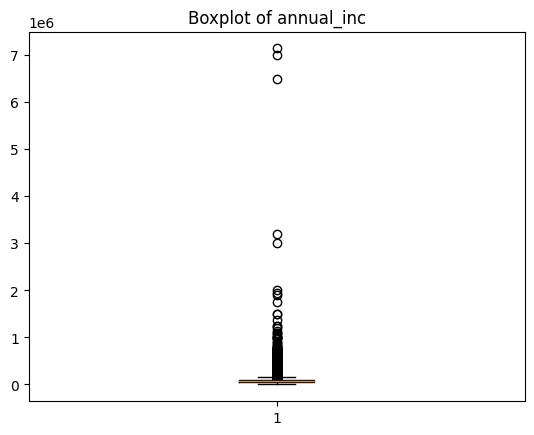

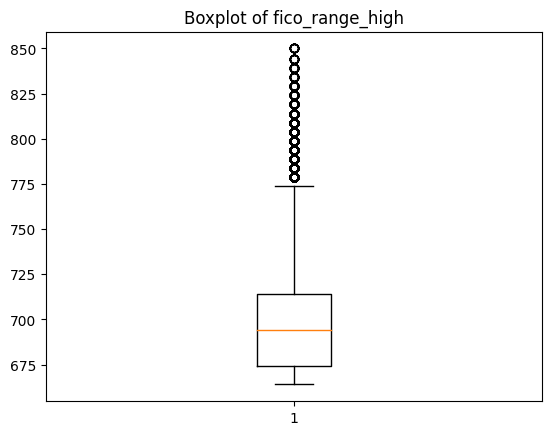

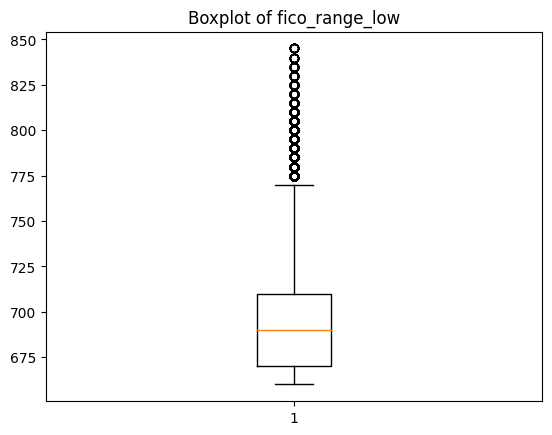

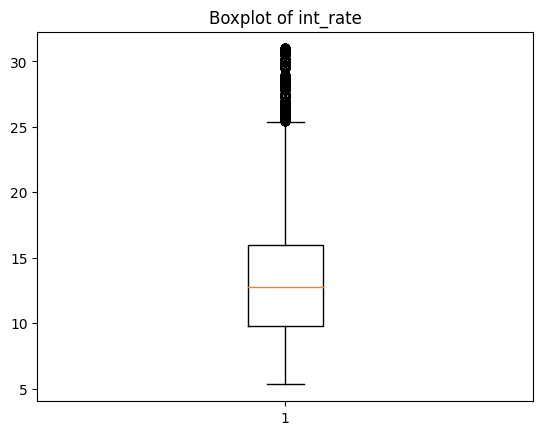

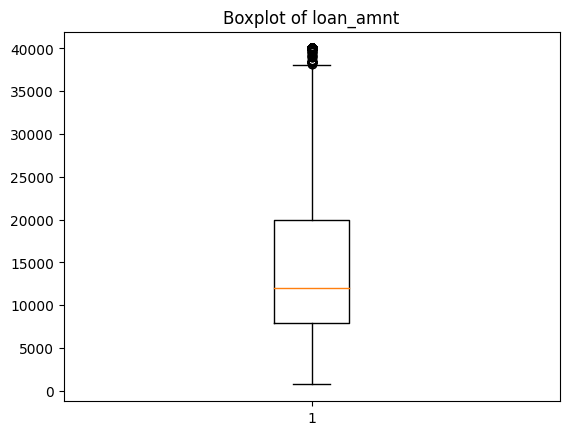

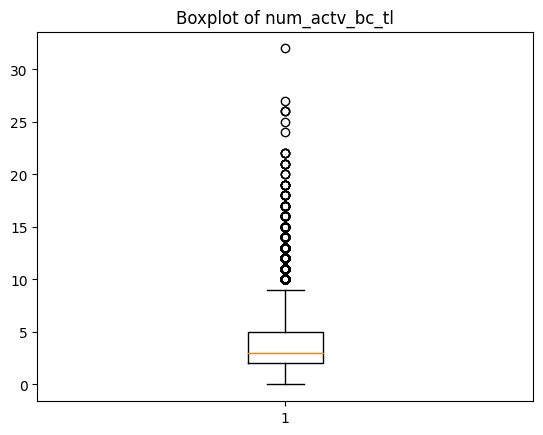

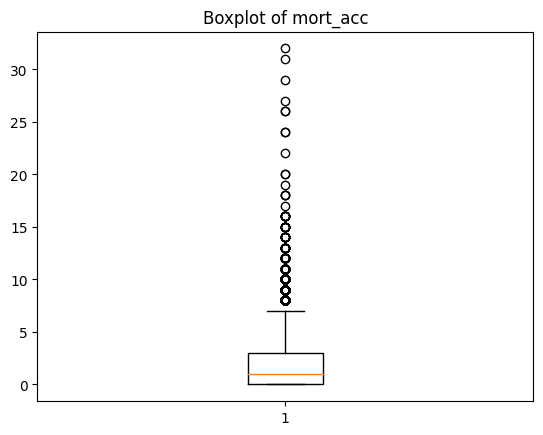

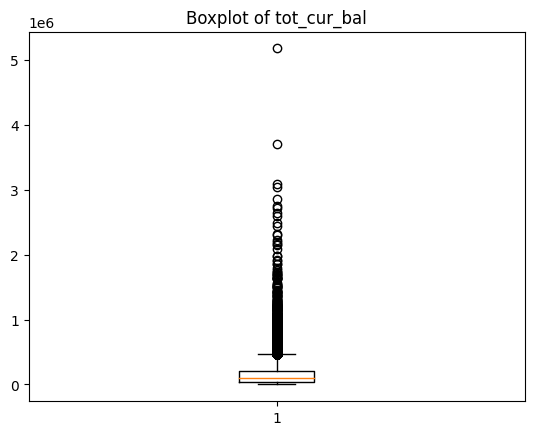

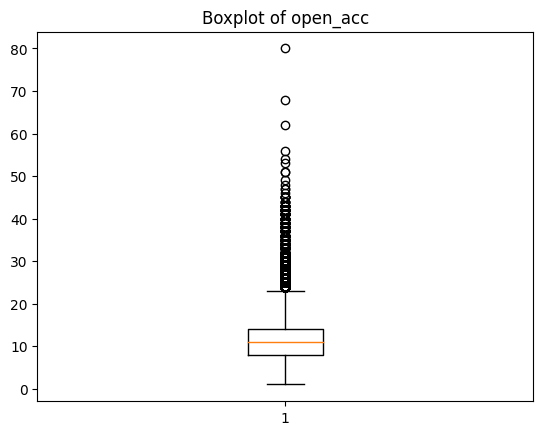

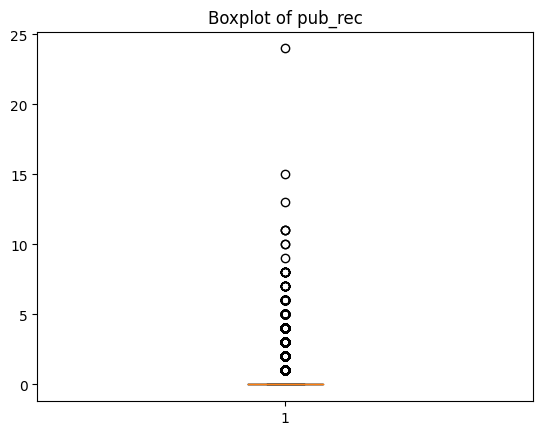

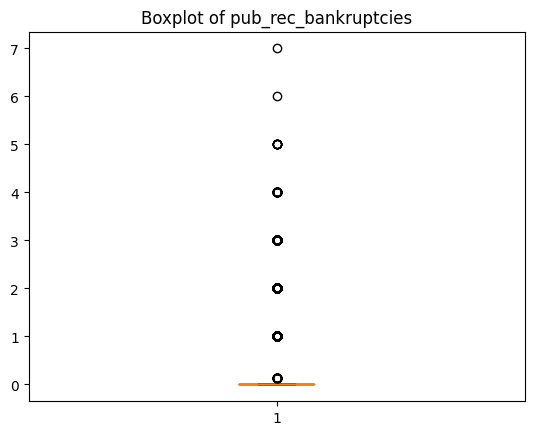

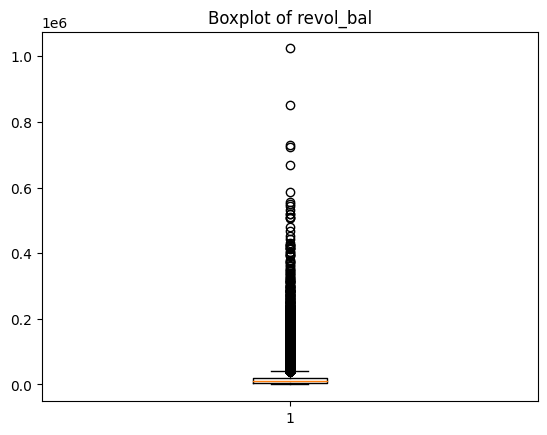

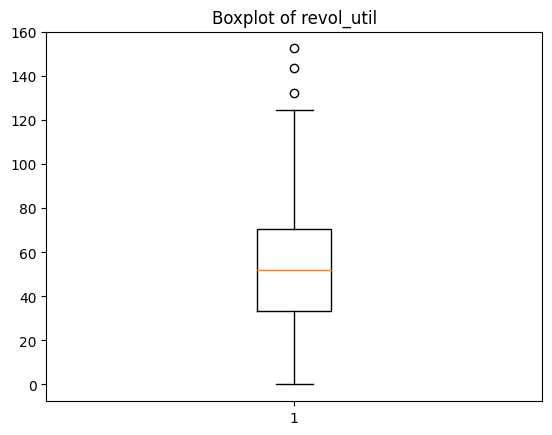

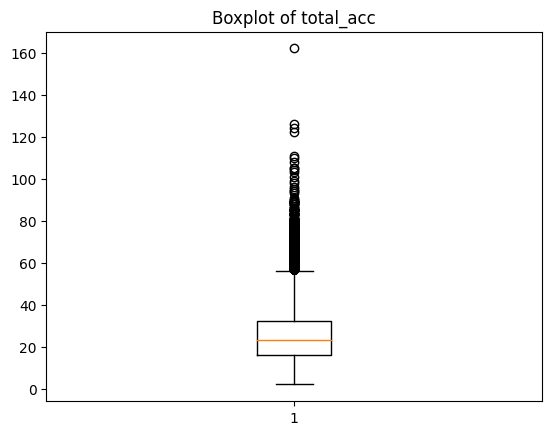


Outliers in test_data:


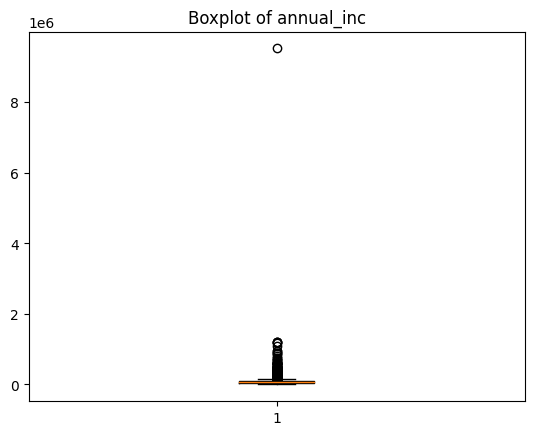

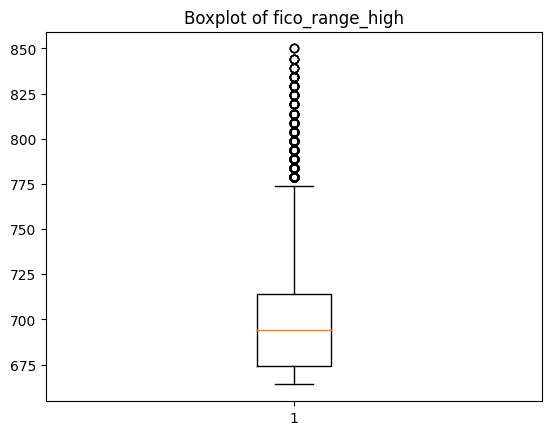

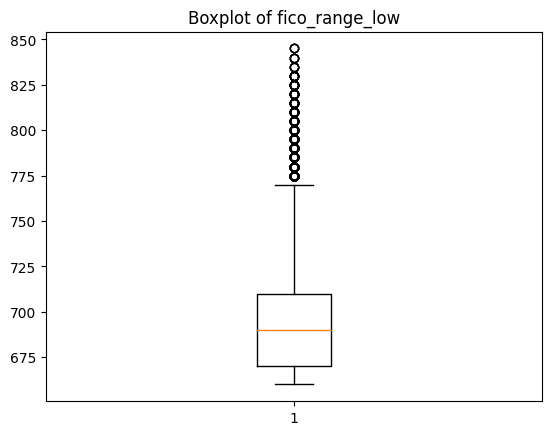

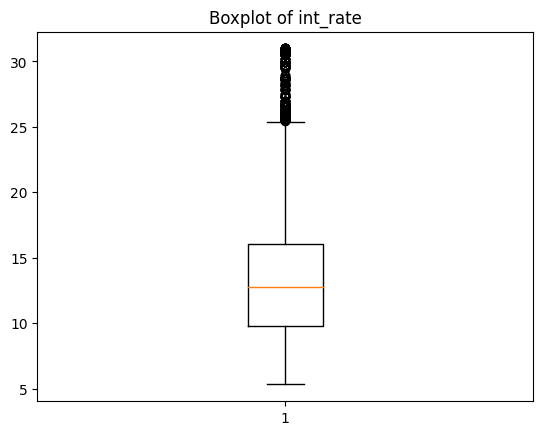

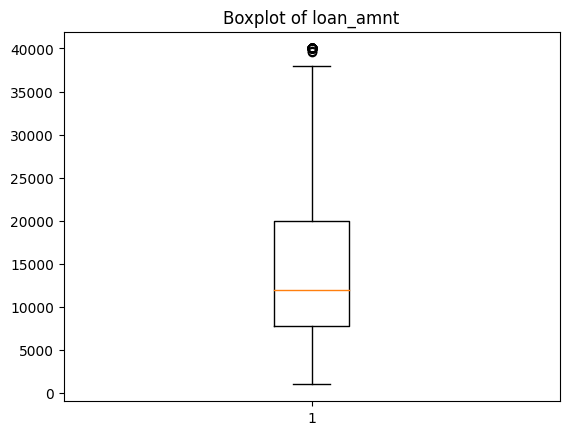

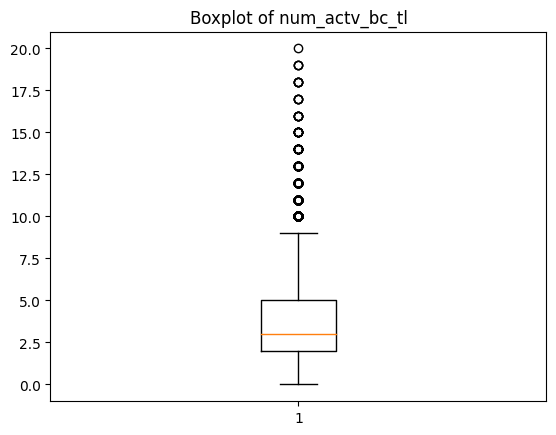

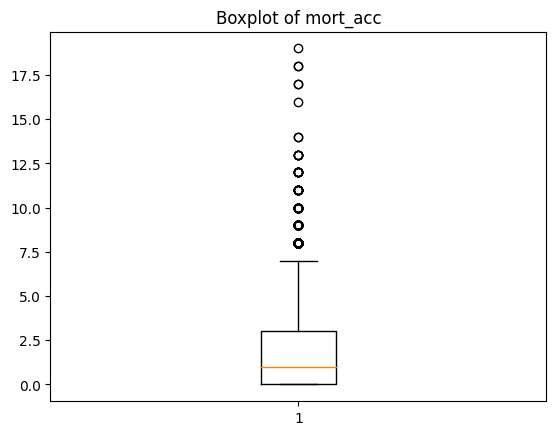

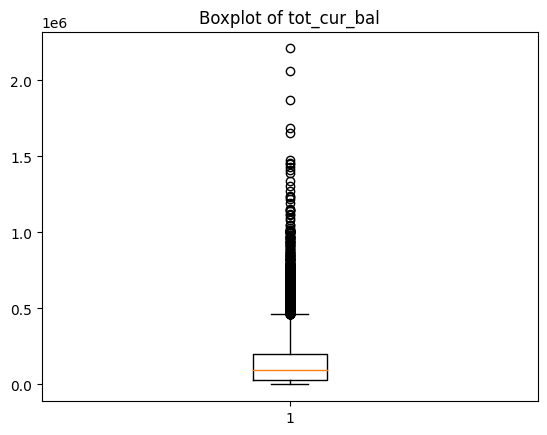

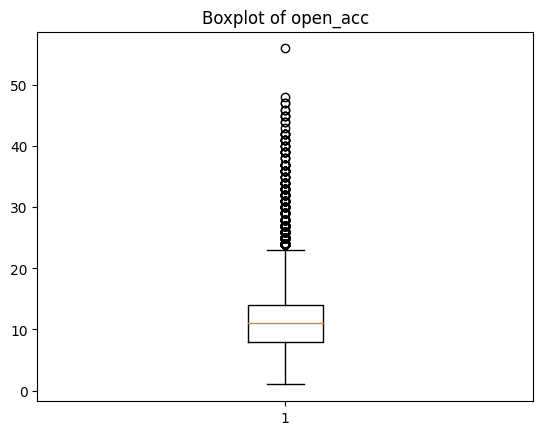

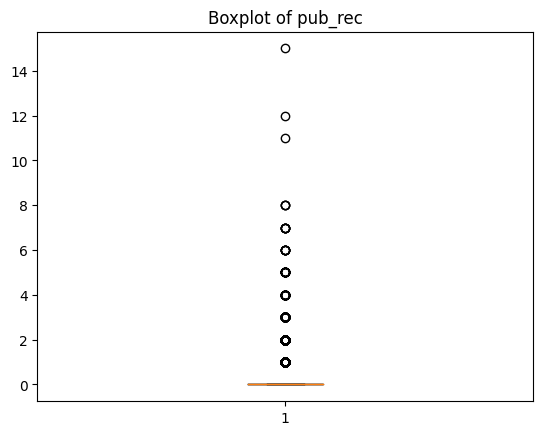

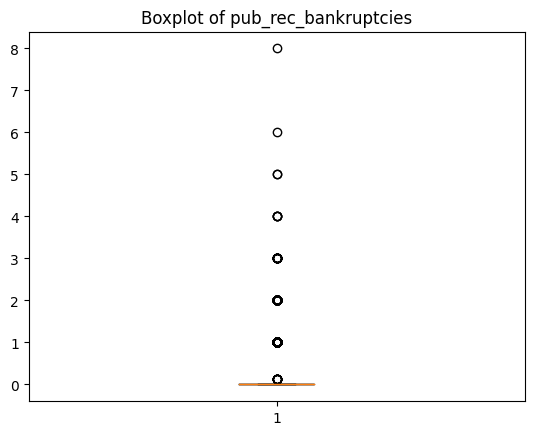

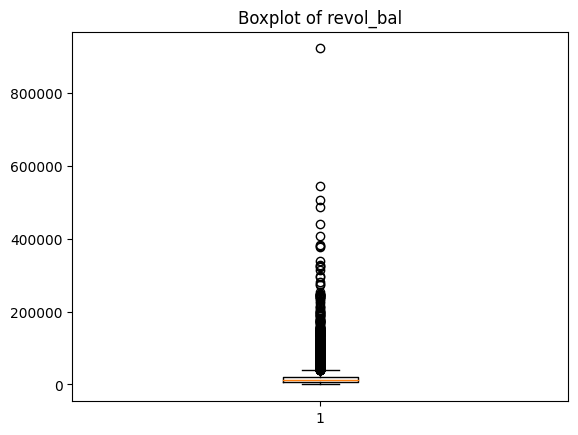

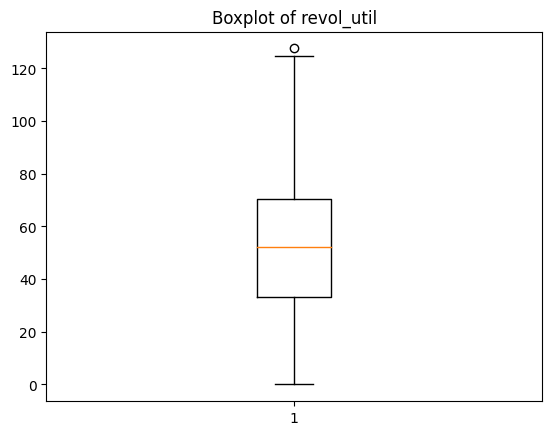

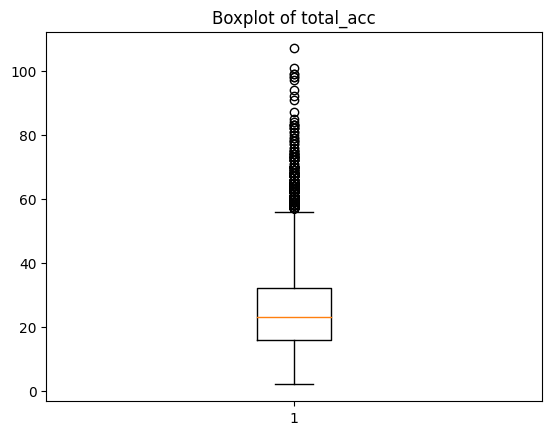

In [20]:
# Checking for Outliers in train_data
print('Outliers in train_data:')
for feature in numerical_features:
    plt.boxplot(df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

# Checking for Outliers in test_data
print('\nOutliers in test_data:')
for feature in numerical_features:
    plt.boxplot(test_data[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()


In [21]:
# Handling outliers for train_data
for feature in numerical_features:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_bound = df[feature].quantile(0.25) - 1.5 * IQR
    upper_bound = df[feature].quantile(0.75) + 1.5 * IQR
    df[feature] = df[feature].clip(lower=lower_bound, upper=upper_bound)

# Handling outliers for test_data
for feature in numerical_features:
    IQR = test_data[feature].quantile(0.75) - test_data[feature].quantile(0.25)
    lower_bound = test_data[feature].quantile(0.25) - 1.5 * IQR
    upper_bound = test_data[feature].quantile(0.75) + 1.5 * IQR
    test_data[feature] = test_data[feature].clip(lower=lower_bound, upper=upper_bound)

In [22]:
# Check unique values and formats of categorical features
categorical_features = ['addr_state', 'emp_length', 'emp_title', 'grade', 'home_ownership', 'application_type', 'purpose', 'sub_grade', 'term', 'title', 'verification_status']
for feature in categorical_features:
    print(f"Unique values for {feature}: {df[feature].unique()}")

Unique values for addr_state: ['CO' 'CA' 'FL' 'IL' 'MD' 'NY' 'PA' 'WI' 'UT' 'TX' 'AL' 'KS' 'AR' 'AZ'
 'MI' 'MN' 'LA' 'HI' 'NC' 'VT' 'OK' 'KY' 'ME' 'CT' 'AK' 'NJ' 'IN' 'GA'
 'MA' 'OR' 'NM' 'VA' 'TN' 'SC' 'NV' 'WY' 'WA' 'WV' 'MO' 'OH' 'MS' 'DC'
 'NE' 'ID' 'NH' 'RI' 'SD' 'MT' 'DE' 'ND' 'IA']
Unique values for emp_length: ['10+ years' '3 years' '< 1 year' '1 year' '8 years' '7 years' '4 years'
 '2 years' '5 years' '6 years' '9 years']
Unique values for emp_title: ['Deputy' 'Department of Veterans Affairs' 'Marble polishing' ...
 'COAL MINER' 'repair tec' 'Sports Group Manager']
Unique values for grade: ['E' 'B' 'F' 'D' 'C' 'A' 'G']
Unique values for home_ownership: ['MORTGAGE' 'RENT' 'OWN' 'ANY' 'NONE' 'OTHER']
Unique values for application_type: ['Individual' 'Joint App']
Unique values for purpose: ['debt_consolidation' 'home_improvement' 'credit_card' 'other'
 'small_business' 'medical' 'major_purchase' 'car' 'vacation' 'house'
 'moving' 'wedding' 'renewable_energy' 'educational']
Unique

Preparing the Data for Analysis through Necessary Transformations

In [23]:
# Separating the numerical and categorical columns
def data_type(df):
    numerical = []
    categorical = []
    for i in df.columns:
        if df[i].dtype == 'int64' or df[i].dtype == 'float64':
            numerical.append(i)
        else:
            categorical.append(i)
    return numerical, categorical


numerical, categorical = data_type(df)

# Identifying the binary columns and ignoring them from scaling
def binary_columns(df):
    binary_cols = []
    for col in df.select_dtypes(include=['int', 'float']).columns:
        unique_values = df[col].unique()
        if np.in1d(unique_values, [0, 1]).all():
            binary_cols.append(col)
    return binary_cols

binary_cols = binary_columns(df)

# Remove the binary columns from the numerical columns
numerical = [i for i in numerical if i not in binary_cols]

def encoding(df, categorical):
    for i in categorical:
        df[i] = df[i].astype('category')
        df[i] = df[i].cat.codes
    return df

df = encoding(df, categorical)

Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

Exploratory Data Analysis

Exploring the data with summary statistics and visualizations

In [25]:
# summary statistics for numerical features

df[numerical_features].describe()


,annual_inc,fico_range_high,fico_range_low,int_rate,loan_amnt,num_actv_bc_tl,mort_acc,tot_cur_bal,open_acc,pub_rec,pub_rec_bankruptcies,revol_bal,revol_util,total_acc
count,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,8.000000e+04,80000.0,80000.0,8.000000e+04,8.000000e+04,8.000000e+04
mean,3.725908e-16,-6.881606e-16,-6.881606e-16,5.275780e-17,8.739676e-17,1.329603e-16,8.784085e-17,-3.078426e-16,-1.546319e-16,0.0,0.0,-2.984279e-17,1.518785e-16,-7.931433e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,0.0,0.0,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.069539e+00,-1.196518e+00,-1.196518e+00,-1.695623e+00,-1.572629e+00,-1.758388e+00,-8.846094e-01,-1.063207e+00,-2.109263e+00,0.0,0.0,-1.304771e+00,-2.118786e+00,-1.988454e+00
25%,-7.491708e-01,-8.567531e-01,-8.567531e-01,-7.404180e-01,-7.456308e-01,-7.790855e-01,-8.846094e-01,-8.178925e-01,-6.938946e-01,0.0,0.0,-7.574093e-01,-7.511302e-01,-7.722577e-01
50%,-2.038014e-01,-1.772235e-01,-1.772235e-01,-9.716037e-02,-2.759420e-01,-2.894341e-01,-3.487636e-01,-3.300420e-01,-8.730803e-02,0.0,0.0,-2.853289e-01,1.230725e-02,-1.641594e-01
75%,5.137899e-01,5.023062e-01,5.023062e-01,6.020327e-01,6.461463e-01,6.898685e-01,7.229279e-01,5.417150e-01,5.192786e-01,0.0,0.0,4.967542e-01,7.716622e-01,6.176813e-01
max,2.408231e+00,2.540895e+00,2.540895e+00,2.615709e+00,2.733812e+00,2.893299e+00,3.134234e+00,2.581126e+00,2.339038e+00,0.0,0.0,2.377999e+00,3.055851e+00,2.702590e+00


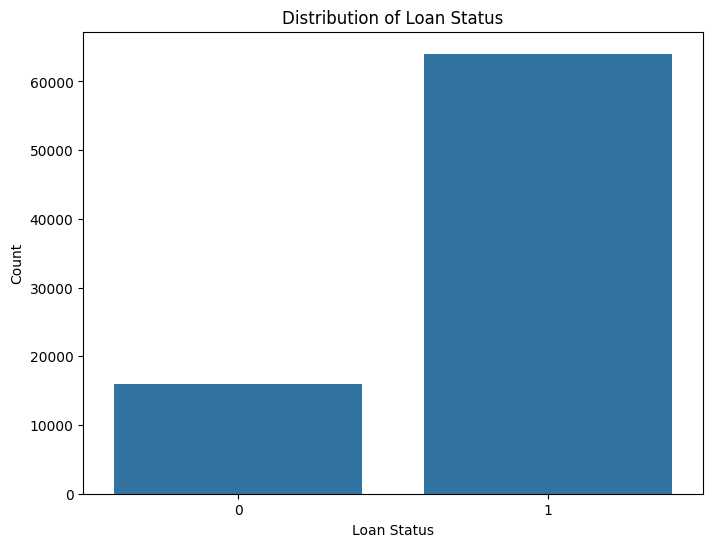

In [26]:
#Visualizations
#Distribution of Target Variable

plt.figure(figsize=(8, 6))
sns.countplot(x='loan_status', data=df)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

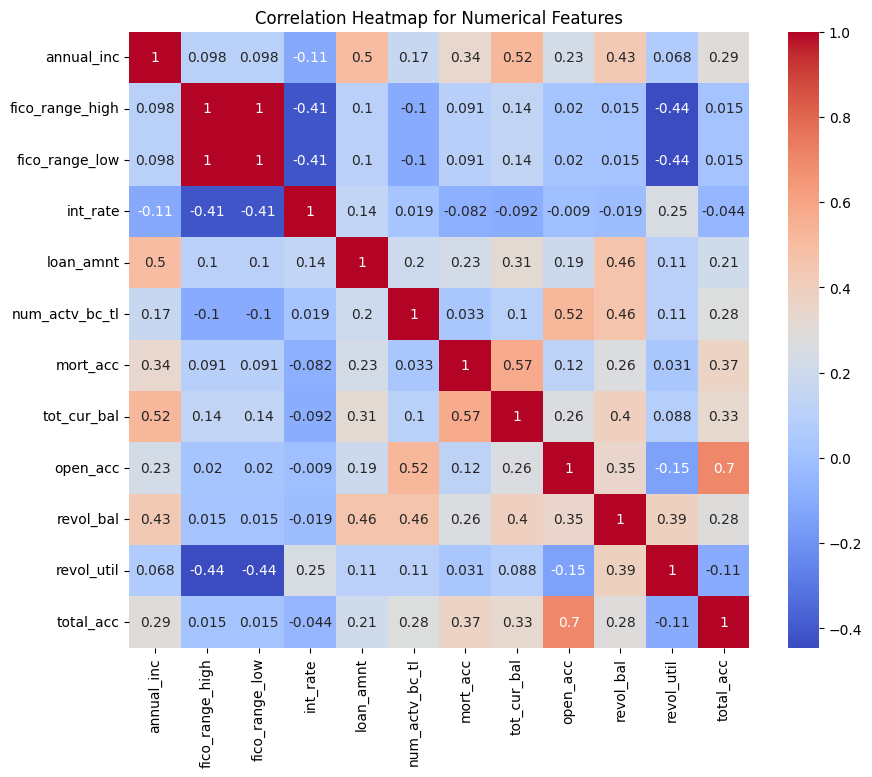

In [27]:
numerical_features = ['annual_inc', 'fico_range_high', 'fico_range_low', 'int_rate', 'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc', 'revol_bal', 'revol_util', 'total_acc']

# Correlation heat map for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_features].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Numerical Features')
plt.show()


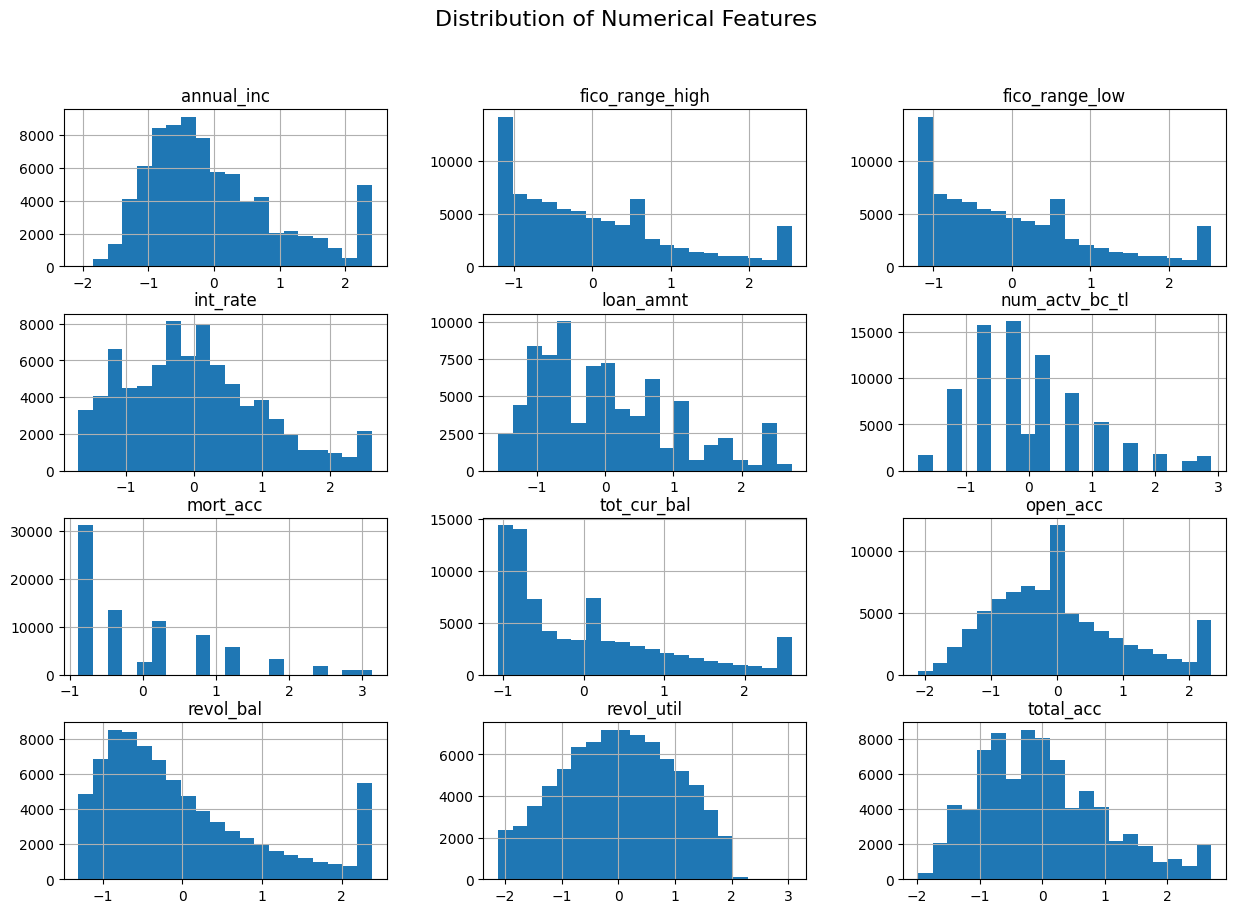

In [28]:
#Distribution of Numerical Features

df[numerical_features].hist(bins=20, figsize=(15, 10))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.show()

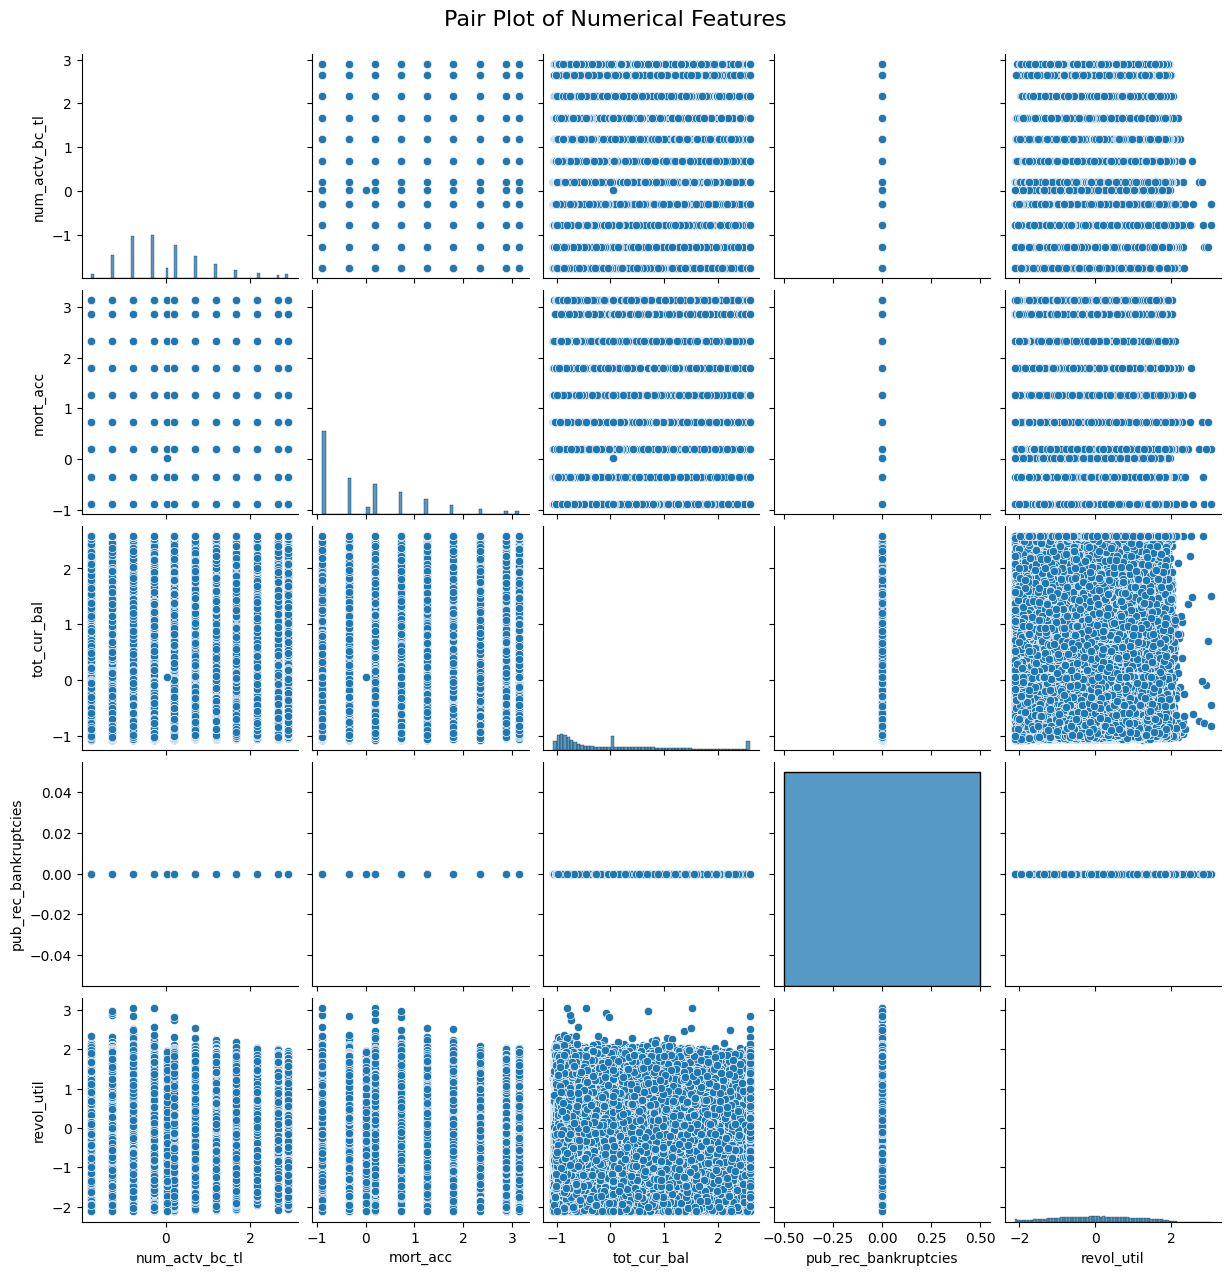

In [29]:
numerical_features = ['num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'pub_rec_bankruptcies', 'revol_util']

#Relationship Between Features
sns.pairplot(df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02, fontsize=16)
plt.show()

In [30]:
# Separating features and target variable for training set
X = df.drop(columns=['loan_status'])
y = df['loan_status']

X_test = df


# Check for class distribution in the training set
print("Class distribution in the training set:")
print(y.value_counts())

Class distribution in the training set:
loan_status
1    64030
0    15970
Name: count, dtype: int64


Handling Class Imbalance using SMOTE (Synthetic Minority Over-sampling Technique)



In [31]:
# Initializing SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)

# Performing oversampling on the training data
X_resampled, y_resampled = smote.fit_resample(X, y)

# Checking the class distribution after oversampling
print("Class distribution after oversampling:")
print(pd.Series(y_resampled).value_counts())

Class distribution after oversampling:
loan_status
0    64030
1    64030
Name: count, dtype: int64


Feature Selection using RandomForestClassifier

In [32]:
# Initialize a random forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the resampled training data
rf_classifier.fit(X_resampled, y_resampled)

# Select features based on the importance weights from the classifier
feature_selector = SelectFromModel(rf_classifier, prefit=True)

# Transform the training data to select the most important features
X_selected = feature_selector.transform(X_resampled)

# Get the selected feature indices
selected_feature_indices = feature_selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X_resampled.columns[selected_feature_indices]

# Print the selected feature names
print("Selected features:")
print(selected_features)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Selected features:
Index(['addr_state', 'annual_inc', 'earliest_cr_line', 'emp_title',
       'fico_range_high', 'fico_range_low', 'home_ownership', 'int_rate',
       'loan_amnt', 'num_actv_bc_tl', 'mort_acc', 'tot_cur_bal', 'open_acc',
       'revol_bal', 'revol_util', 'sub_grade'],
      dtype='object')


# Machine Learning model building

In [35]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y_resampled, test_size=0.2, random_state=42)


In [36]:
# Training the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [37]:
# Predicting on the test set
y_pred = rf_classifier.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)

Accuracy Score: 0.8657660471653912
Precision Score: 0.8740743696005707
Recall Score: 0.8657660471653912


In [42]:
# Computing the F1 score
f1_score = f1_score(y_test, y_pred)
print("F1 Score:", f1_score)

F1 Score: 0.8762775298690083


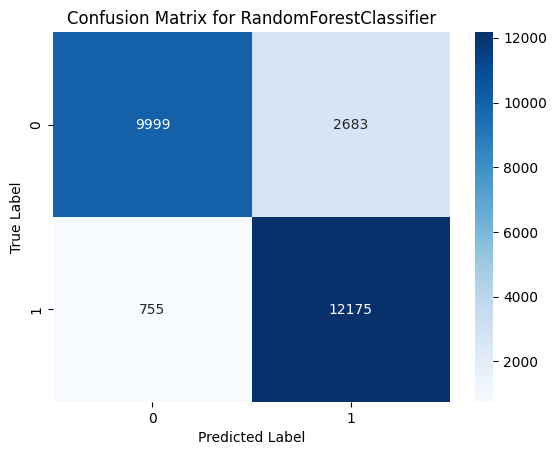

In [44]:
# Visualizing the confusion matrix
from sklearn.metrics import confusion_matrix

# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for RandomForestClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Cross Validation for RandomForestClassifier

In [45]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score

# Initialize  classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Perform k-fold cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=5)  # Specify the number of folds (e.g., cv=5 for 5-fold CV)

# Print the mean and standard deviation of the cross-validation scores
print("Mean CV Accuracy:", cv_scores.mean())
print("Std CV Accuracy:", cv_scores.std())

Mean CV Accuracy: 0.8003125000000001
Std CV Accuracy: 0.0007288689868556642


GridSearch for XGB

In [46]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)

In [47]:
# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='f1', verbose=2, n_jobs=-1)

In [48]:
# Perform grid search cross-validation
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.3],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=2)

In [49]:
# Get the best hyperparameters
best_params = grid_search.best_params_

# Print the best hyperparameters
print("Best Hyperparameters:")
print(best_params)

Best Hyperparameters:
{'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 300}


In [50]:
# Predictions on the test set using the best model
best_xgb_model = grid_search.best_estimator_
y_pred_test = best_xgb_model.predict(X_train)

In [54]:
# Train the XGBClassifier with the best hyperparameters
best_xgb_model = XGBClassifier(**best_params)
best_xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
# Predict on the test set
y_pred_best_xgb = best_xgb_model.predict(X_test)

In [58]:
# Evaluate the model performance
print("Classification Report:")
print(classification_report(y_test, y_pred_best_xgb))

accuracy = accuracy_score(y_test, y_pred_best_xgb)
precision = precision_score(y_test, y_pred_best_xgb, average='weighted')
recall = recall_score(y_test, y_pred_best_xgb, average='weighted')


print("Accuracy Score:", accuracy)
print("Precision Score:", precision)
print("Recall Score:", recall)


Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.76      0.85     12682
           1       0.81      0.98      0.88     12930

    accuracy                           0.87     25612
   macro avg       0.89      0.87      0.87     25612
weighted avg       0.89      0.87      0.87     25612

Accuracy Score: 0.8709979697017023
Precision Score: 0.8884053511838614
Recall Score: 0.8709979697017023


In [59]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

# Get the f1 score as a float
f1_score = f1_score(y_test, y_pred_best_xgb, average='weighted')

print("F1 Score:", f1_score)

F1 Score: 0.8693818559854366


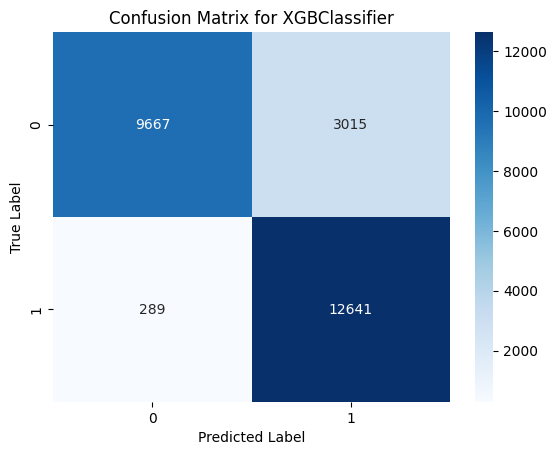

In [60]:
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred_best_xgb)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion Matrix for XGBClassifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Saving the Random Forest model and XGBoost model

In [61]:
import pickle

# Save the Random Forest model
with open('random_forest.pkl', 'wb') as f:
    pickle.dump(rf_classifier, f)

# Save the XGBoost model
with open('xgboost.pkl', 'wb') as f:
    pickle.dump(best_xgb_model, f)




This code implements a loan repayment assessment model using a dataset of loan applications. The code performs data cleaning, handling missing values and outliers, feature engineering, and model training. It utilizes both Random Forest and XGBoost classifiers for prediction and evaluates their performance using various metrics and both performed well.